In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("payment_delay_dataset.csv")
df.head()

,Customer ID,Customer Name,Customer Email,Customer Country,Invoice Amount,Payment Method,Payment Due Date,Payment Date,Delay (Days)
0,efdbcf37-8178-4831-be51-d465d93bfb76,James Hall,zfisher@example.net,Paraguay,7577.91,PayPal,2024-04-11,2024-05-01,20
1,2ba00055-63c6-4557-a720-035772fbd2a8,Amy Campbell,xelliott@example.com,Puerto Rico,3831.07,Credit Card,2023-08-08,2023-08-02,-6
2,0a50f650-c96a-4181-a950-a63e82179560,Vickie Haas,kristymontoya@example.net,Kenya,7834.11,Credit Card,2024-03-04,2024-03-19,15
3,074d2ceb-df75-431d-9920-9012bb53bbf4,James Taylor,uashley@example.net,Cayman Islands,9072.57,Bank Transfer,2023-08-30,2023-08-24,-6
4,f7212141-cfd1-41a9-8eee-f4bb18f027de,Audrey Edwards,jason27@example.org,Trinidad and Tobago,5410.80,Credit Card,2023-07-23,2023-08-03,11


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077 entries, 0 to 2076
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer ID       2077 non-null   object 
 1   Customer Name     2077 non-null   object 
 2   Customer Email    2077 non-null   object 
 3   Customer Country  2077 non-null   object 
 4   Invoice Amount    2077 non-null   float64
 5   Payment Method    2077 non-null   object 
 6   Payment Due Date  2077 non-null   object 
 7   Payment Date      2077 non-null   object 
 8   Delay (Days)      2077 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 146.2+ KB


In [4]:
df.columns

Index(['Customer ID', 'Customer Name', 'Customer Email', 'Customer Country',
       'Invoice Amount', 'Payment Method', 'Payment Due Date', 'Payment Date',
       'Delay (Days)'],
      dtype='object')

<Axes: xlabel='Payment Due Date'>

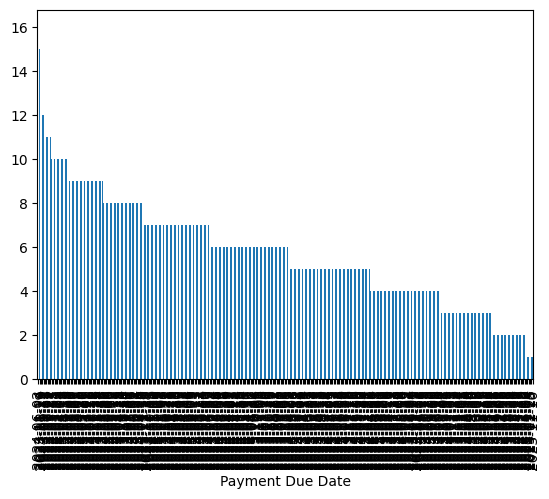

In [5]:
df.value_counts("Payment Due Date").plot(kind="bar")

<Axes: xlabel='Delay (Days)'>

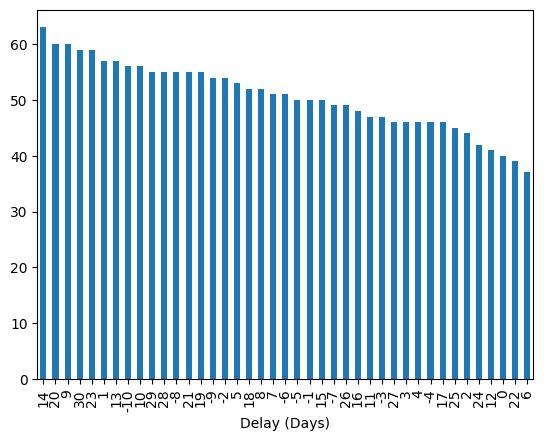

In [6]:
df.value_counts("Delay (Days)").plot(kind="bar")

<Axes: xlabel='Payment Date'>

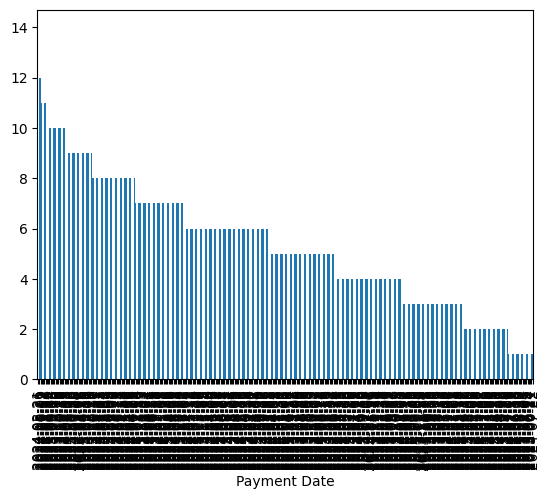

In [7]:
df.value_counts("Payment Date").plot(kind="bar")

In [8]:
df.value_counts("Invoice Amount")

Invoice Amount
3994.84    2
6729.03    2
6786.13    2
6066.02    2
6850.53    1
          ..
3602.78    1
3601.25    1
3594.19    1
3589.55    1
9998.72    1
Name: count, Length: 2073, dtype: int64

<Axes: xlabel='Delay (Days)'>

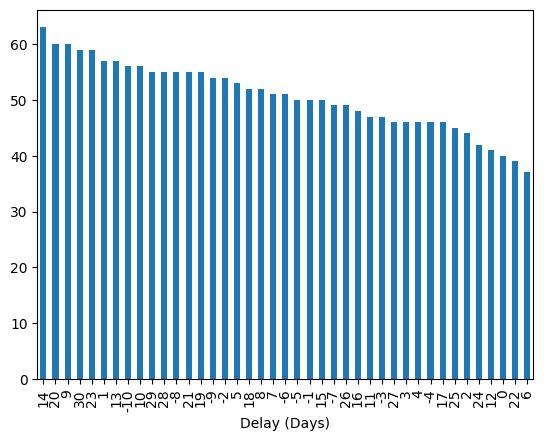

In [9]:
df.value_counts("Delay (Days)").plot(kind="bar")


In [10]:
df = df.drop(columns=["Customer ID"])
df.head()


,Customer Name,Customer Email,Customer Country,Invoice Amount,Payment Method,Payment Due Date,Payment Date,Delay (Days)
0,James Hall,zfisher@example.net,Paraguay,7577.91,PayPal,2024-04-11,2024-05-01,20
1,Amy Campbell,xelliott@example.com,Puerto Rico,3831.07,Credit Card,2023-08-08,2023-08-02,-6
2,Vickie Haas,kristymontoya@example.net,Kenya,7834.11,Credit Card,2024-03-04,2024-03-19,15
3,James Taylor,uashley@example.net,Cayman Islands,9072.57,Bank Transfer,2023-08-30,2023-08-24,-6
4,Audrey Edwards,jason27@example.org,Trinidad and Tobago,5410.80,Credit Card,2023-07-23,2023-08-03,11


In [11]:
outlier_index = df['Invoice Amount'].idxmax()

# Replace the outlier with the mean
df['Invoice Amount'].iloc[outlier_index] = df['Invoice Amount'].mean()

<ipython-input-11-9ca8464383e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Invoice Amount'].iloc[outlier_index] = df['Invoice Amount'].mean()


<Axes: xlabel='Invoice Amount'>

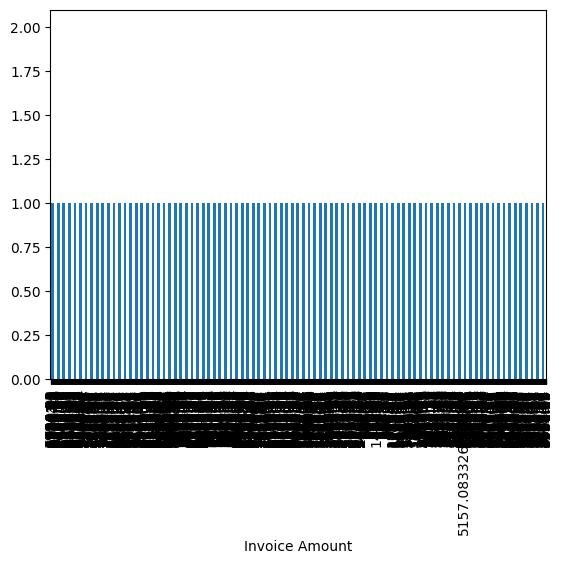

In [12]:
df.value_counts('Invoice Amount').plot(kind="bar")


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df.select_dtypes(include='object'):
  df[col] = le.fit_transform(df[col])

df.head()


,Customer Name,Customer Email,Customer Country,Invoice Amount,Payment Method,Payment Due Date,Payment Date,Delay (Days)
0,793,2046,169,7577.91,3,287,309,20
1,89,1994,175,3831.07,2,41,38,-6
2,1981,1059,112,7834.11,2,250,267,15
3,808,1845,40,9072.57,0,63,60,-6
4,193,801,220,5410.80,2,25,39,11


In [14]:
X = df.drop(columns=["Delay (Days)"])
y = df["Delay (Days)"]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
X_train.head()

,Customer Name,Customer Email,Customer Country,Invoice Amount,Payment Method,Payment Due Date,Payment Date
538,1992,714,65,1205.94,2,259,284
1273,1389,1310,82,9222.84,3,170,185
300,1436,34,26,2615.48,2,71,88
438,805,2035,102,2192.00,1,166,196
781,522,1541,145,3957.41,0,154,149


In [16]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate the model on the testing set
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("r2 score:", r2)

Mean squared error: 5.853074038461538
r2 score: 0.9583132324212239


In [17]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("r2 score:", r2)

Mean squared error: 0.3104303266847263
r2 score: 0.9977890529330616


In [19]:
import pickle

# Save the Random Forest model
with open('payment_delay_model.pkl', 'wb') as f:
  pickle.dump(model, f)

# Save the Linear Regression model
with open('linear_regression_model.pkl', 'wb') as f:
  pickle.dump(model, f)

In [23]:
model.predict([[89,1994,175,3831.07,2,41,38]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-6.37801598])

In [20]:
df.columns

Index(['Customer Name', 'Customer Email', 'Customer Country', 'Invoice Amount',
       'Payment Method', 'Payment Due Date', 'Payment Date', 'Delay (Days)'],
      dtype='object')